<a href="https://colab.research.google.com/github/Samia1925/Online-Course-Engagement-Prediction/blob/main/ProjectWithRF_Samia_2154901109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project ML 2154901109

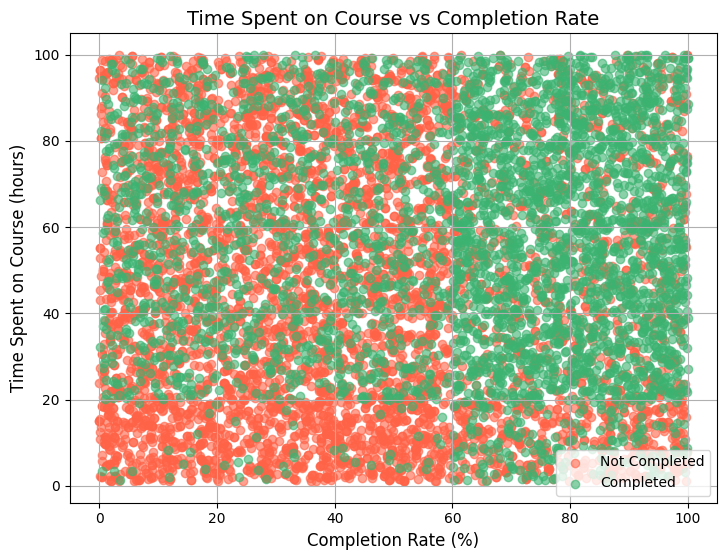

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("online_course_engagement_data.csv")

x = df['CompletionRate']
y = df['TimeSpentOnCourse']
labels = df['CourseCompletion']

# Define plotting style
colors = {0: 'tomato', 1: 'mediumseagreen'}

plt.figure(figsize=(14, 6))

# Decision Tree Visual
plt.subplot(1, 2, 1)
plt.scatter(x[labels == 0], y[labels == 0], c=colors[0], label='Not Completed', alpha=0.6)
plt.scatter(x[labels == 1], y[labels == 1], c=colors[1], label='Completed', alpha=0.6)

plt.title('Time Spent on Course vs Completion Rate', fontsize=14)
plt.xlabel('Completion Rate (%)', fontsize=12)
plt.ylabel('Time Spent on Course (hours)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("online_course_engagement_data.csv")
num_categories = df['CourseCategory'].nunique()
print("Number of unique Course Categories:", num_categories)
print("Unique Course Categories:", df['CourseCategory'].unique())

Number of unique Course Categories: 5
Unique Course Categories: ['Health' 'Arts' 'Science' 'Programming' 'Business']


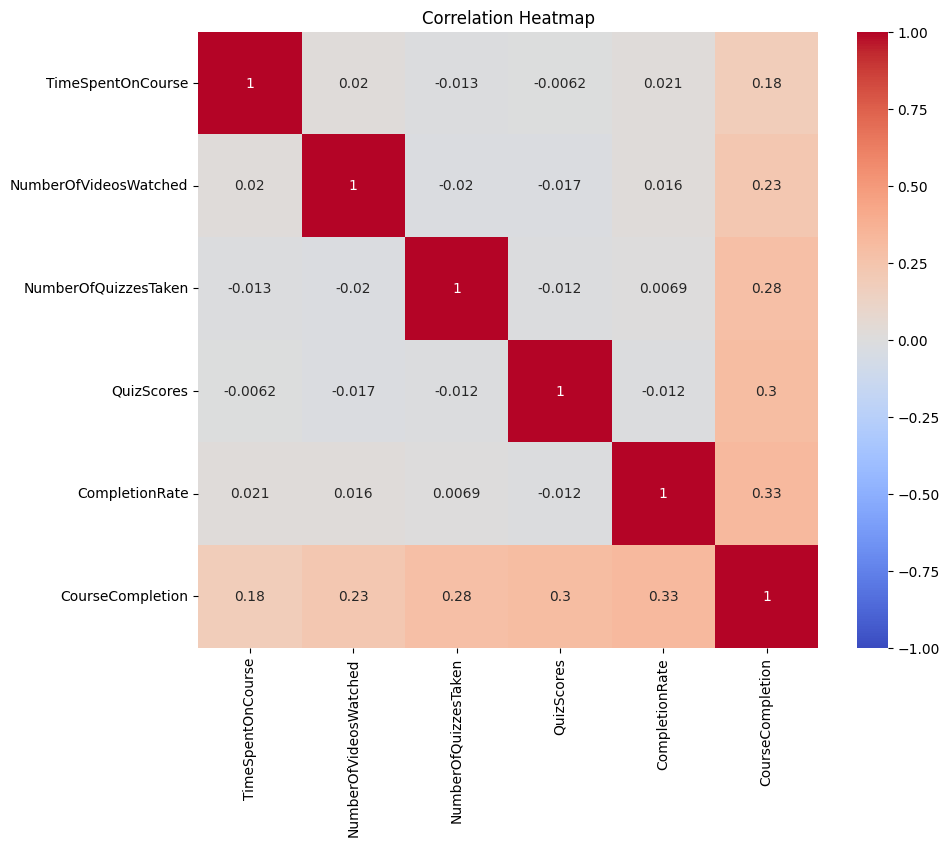

In [ ]:
import seaborn as sns
correlation_matrix = df[['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'CourseCompletion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

## data preprocessing

### importing all libraries

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from matplotlib import cm


### Load the data

In [ ]:
df = pd.read_csv("online_course_engagement_data.csv")

### checking mssing values

In [ ]:
missing_data= df.isnull().sum()
print("missing data: \n", missing_data)

missing data: 
 UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64


### Handle categorical variable: CourseCategory

In [ ]:
label_encoder = LabelEncoder()
df['CourseCategory'] = label_encoder.fit_transform(df['CourseCategory'])


### Define features and target

In [ ]:
X = df.drop(['UserID', 'CourseCompletion'], axis=1)
y = df['CourseCompletion']

### Boxplot to detect outliers for each feature

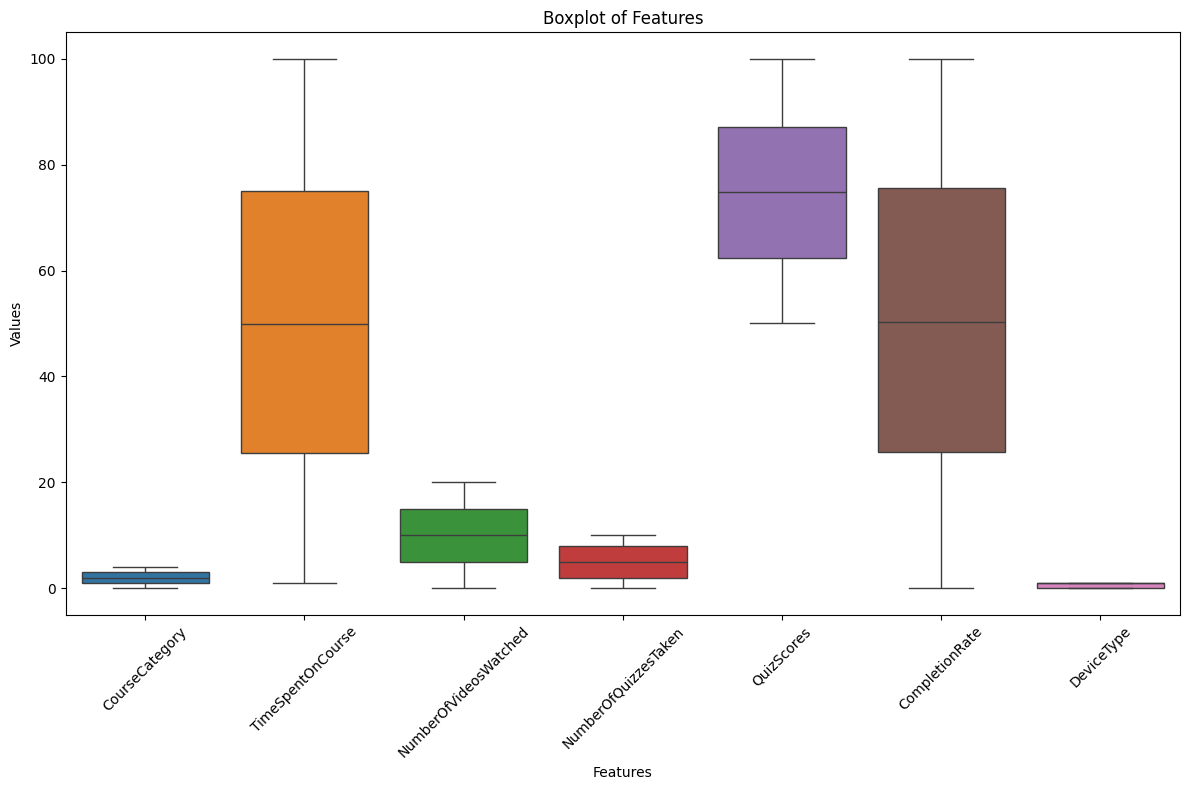

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_outliers.png')

### Check for class imbalance

In [ ]:
print("Class distribution:", y.value_counts(normalize=True))

Class distribution: CourseCompletion
0    0.603556
1    0.396444
Name: proportion, dtype: float64


### Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Handle Imabalance Data with SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Balanced class distribution after SMOTE:\n", y_train_smote.value_counts(normalize=True))

Balanced class distribution after SMOTE:
 CourseCompletion
0    0.5
1    0.5
Name: proportion, dtype: float64


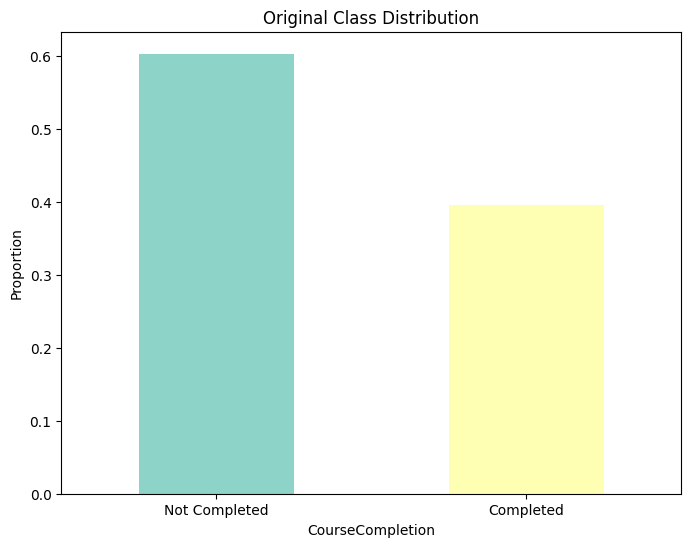

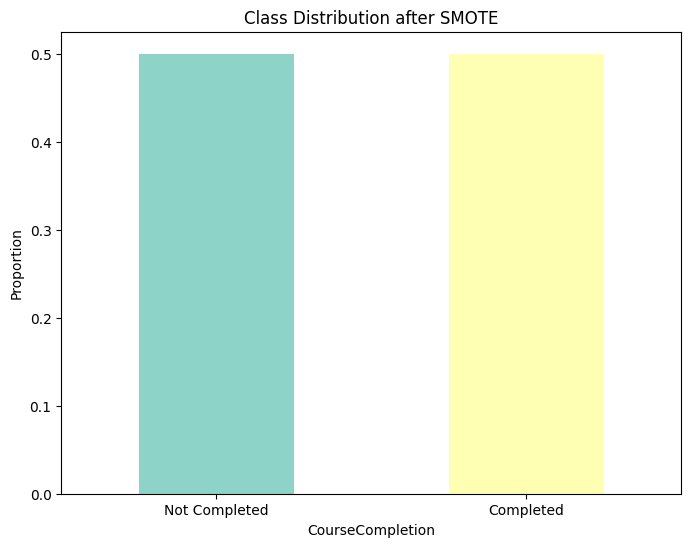

In [ ]:
# Get Set3 colors
set3_colors = cm.Set3(range(2))  # Get first two colors from Set3 palette

# Original class distribution plot
plt.figure(figsize=(8, 6))
pd.Series(y).value_counts(normalize=True).plot(kind='bar', color=set3_colors)
plt.title('Original Class Distribution')
plt.xlabel('CourseCompletion')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Completed', 'Completed'], rotation=0)
plt.show()

# Class distribution after SMOTE plot
plt.figure(figsize=(8, 6))
pd.Series(y_train_smote).value_counts(normalize=True).plot(kind='bar', color=set3_colors)
plt.title('Class Distribution after SMOTE')
plt.xlabel('CourseCompletion')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Completed', 'Completed'], rotation=0)
plt.show()

# project with random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Defining hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [17]:
# Getting the best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9550165399343961


In [18]:
# Making predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
print(f"\nAccuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(class_report)


Accuracy: 0.96
ROC-AUC: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1086
           1       0.95      0.93      0.94       714

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800



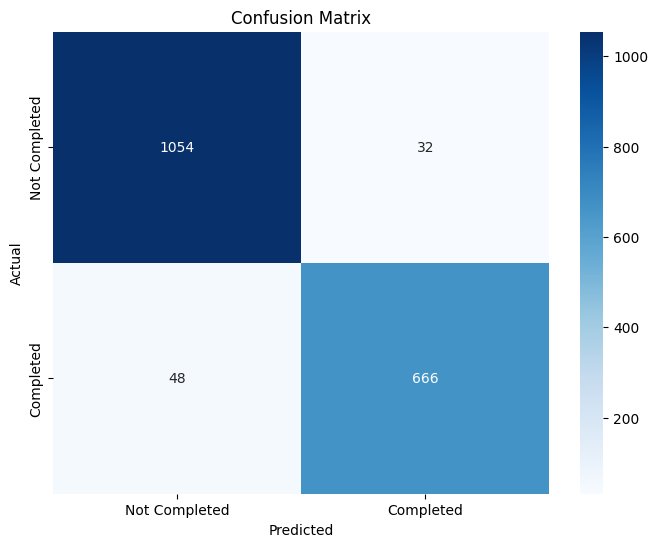

In [20]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')

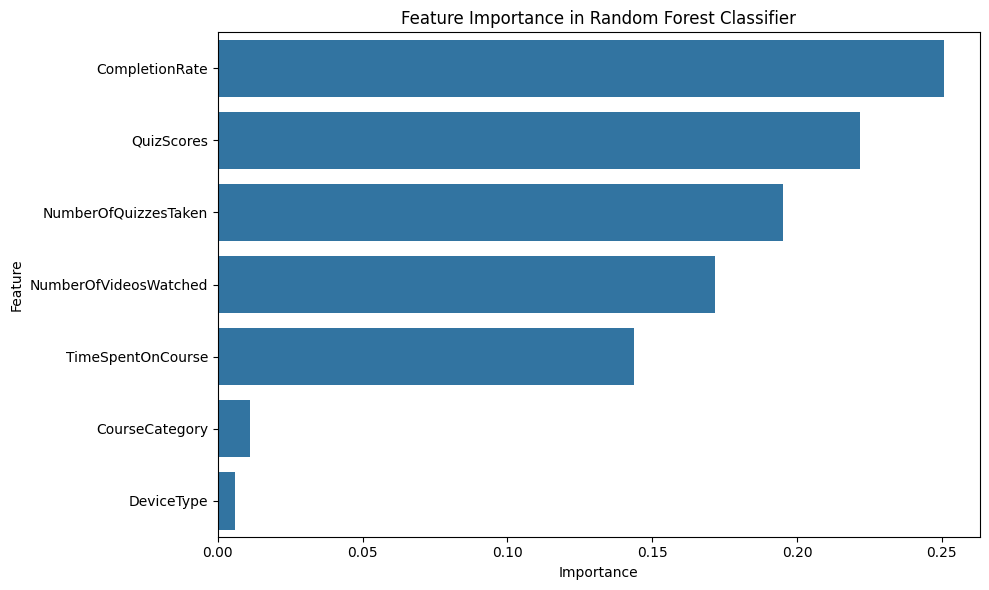

In [21]:
# Creating feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [22]:
def predict_course_completion(new_data, model, label_encoder):
  # Preprocess new data
    new_data['CourseCategory'] = label_encoder.transform(new_data['CourseCategory'])
    new_data = new_data.drop(['UserID'], axis=1, errors='ignore')
    prediction = model.predict(new_data)
    return prediction


In [23]:
# Example usage of prediction function
example_data = pd.DataFrame({
    'UserID': [9999],
    'CourseCategory': ['Health'],
    'TimeSpentOnCourse': [50.0],
    'NumberOfVideosWatched': [10],
    'NumberOfQuizzesTaken': [5],
    'QuizScores': [75.0],
    'CompletionRate': [80.0],
    'DeviceType': [1]
})

In [24]:
prediction = predict_course_completion(example_data, best_rf, label_encoder)
print(f"\nPrediction for example data: {'Completed' if prediction[0] == 1 else 'Not Completed'}")


Prediction for example data: Completed
